In [15]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import pylatexenc

In [16]:
# Step 1: Creating the Quantum Circuit with 3 qubits and 3 classical bits
circuit = QuantumCircuit(3, 3)

In [17]:
# Step 2: Apply X gate to qubit 0 (the one to teleport)
circuit.x(0)  # Initiating qubit 0 to state |1>
circuit.barrier()  # Adding barrier for clarity

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [18]:
# Step 3: Create entanglement between Q1 and Q2 using Hadamard and CNOT gates
circuit.h(1)  # Applying Hadamard gate on Q1
circuit.cx(1, 2)  # Applying CNOT gate with Q1 as control and Q2 as target
circuit.barrier()  # Adding barrier for clarity

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [21]:
# Step 4: Apply CNOT between Q0 and Q1, then Hadamard gate on Q0
circuit.cx(0, 1)  # CNOT gate between Q0 and Q1
circuit.h(0)  # Hadamard gate on Q0
circuit.barrier()  # Adding barrier for clarity

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [22]:
# Step 5: Measure Q0 and Q1, store in classical bits 0 and 1
circuit.measure([0, 1], [0, 1])  # Measure qubits 0 and 1

In [23]:
# Step 6: Add two more gates (CNOT and CZ) between Q1 and Q2 for conditional transformation
circuit.barrier()  # Adding barrier for clarity
circuit.cx(1, 2)  # CNOT gate between Q1 and Q2
circuit.cz(0, 2)  # CZ gate between Q0 and Q2

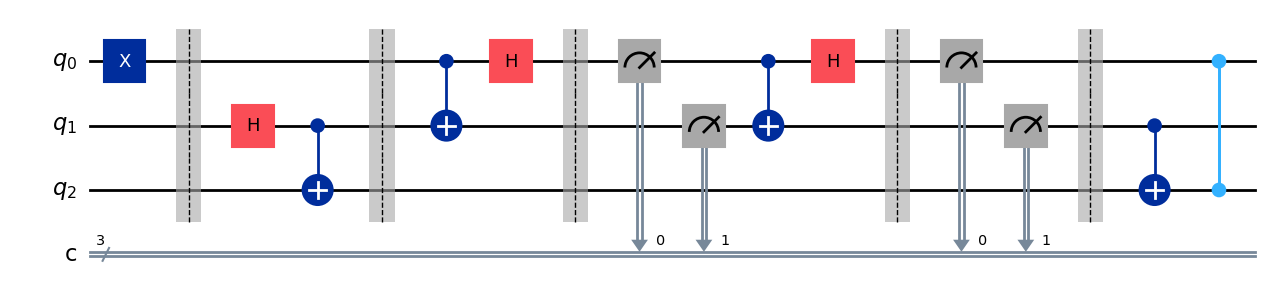

In [24]:
# Step 7: Visualize the circuit
circuit.draw(output='mpl')

In [25]:
# Step 8: Use the AerSimulator for simulation
simulator = AerSimulator()

In [26]:
# Step 9: Execute the circuit with 1000 shots (repetitions) for better accuracy
result = simulator.run(circuit, shots=1000).result()

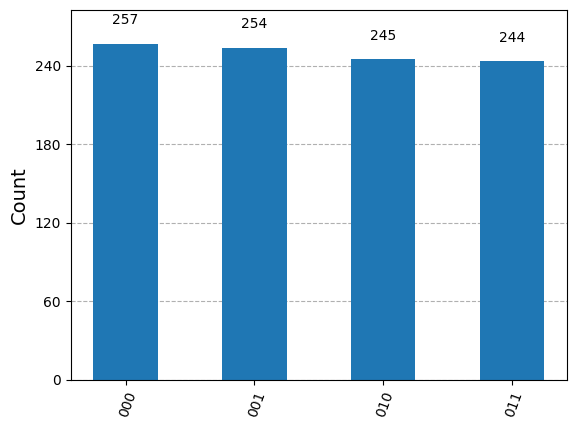

In [27]:
# Step 10: Get the results and plot the histogram
counts = result.get_counts(circuit)
plot_histogram(counts)

Step 1: Importing necessary modules
First, the code imports the required modules from Qiskit. This includes QuantumCircuit from qiskit, and Aer and execute from qiskit_aer. The plot_histogram function from qiskit.visualization is also imported to visualize the results later.

Step 2: Creating the quantum circuit
A quantum circuit is initialized with 3 qubits and 3 classical bits. The classical bits are used for measurements of the qubits, while the quantum bits will undergo various quantum operations like Hadamard gates and CNOT gates.

Step 3: Initializing the teleporting qubit
The qubit that is to be teleported (Q0) is initialized in the |1> state using the X gate. This is done to create a distinguishable initial state, ensuring the teleportation process can be demonstrated properly.

Step 4: Creating entanglement between Q1 and Q2
Next, a Bell pair (entanglement) is created between qubits Q1 and Q2:
A Hadamard gate is applied to Q1, putting it into a superposition state.
A CNOT gate is applied between Q1 and Q2. This entangles the qubits, meaning that the state of Q1 will influence the state of Q2.

Step 5: Applying CNOT and Hadamard gates
To further entangle the system and start the teleportation process, the following gates are applied:
A CNOT gate is applied between Q0 (the qubit to be teleported) and Q1 (the entangled qubit).
A Hadamard gate is applied to Q0. This transforms the state of Q0 into a superposition of the |0> and |1> states.

Step 6: Measurement of Q0 and Q1
After the entanglement and superposition steps, the state of Q0 and Q1 is measured. The results of these measurements are stored in classical bits, which will be used to determine the transformations that need to be applied to Q2 (the teleporting qubit).

Step 7: Applying gates to Q2 based on measurements
Depending on the classical bits’ values (which represent the measurement outcomes), specific gates are applied to Q2 to complete the teleportation process:

If the measurement results in 00, no gate is applied to Q2.
If the result is 01, an X gate is applied to Q2.
If the result is 10, a Z gate is applied to Q2.
If the result is 11, both X and Z gates are applied to Q2.
This step ensures that the final state of Q2 is identical to the initial state of Q0, completing the teleportation process.

Step 8: Running the simulation and displaying results
The circuit is run on a quantum simulator (using the Aer.get_backend('aer_simulator')), and the results are stored in the counts variable. This variable shows how often each possible measurement outcome (e.g., 000, 111) occurs. Finally, the histogram of the results is plotted using plot_histogram, which visualizes the distribution of measurement outcomes.

This complete process simulates quantum teleportation, where a qubit's state is transferred from one location to another without physically moving the qubit itself, demonstrating quantum entanglement and superposition.